In [1]:
import sys
import os
from warnings import simplefilter

# Add the Functions folder to your path
sys.path.append(os.path.abspath("/Users/alexandra/Desktop/EG-CLR/Functions"))

# Now import your functions
from QC_functions import *
from CLR_functions import *
from Verfication_functions import *
from Plot_functions import *

simplefilter(action="ignore", category=pd.errors.PerformanceWarning)


In [2]:
# Read CRISPRi data

CRISPRi_data = pd.read_excel('/Users/alexandra/Desktop/Data/CRISPRiFlowFISH/41588_2019_538_MOESM3_ESM.xlsx',
                             sheet_name='Supplementary Table 3a', 
                             skiprows=0,
                             header=1)

CRISPRi_data_sub= CRISPRi_data[['chr', 'start', 'end', 'Element name', 'Gene', 'Adjusted p-value', 'Significant', 'Fraction change in gene expr','Power to detect 25% effects', 'Valid E-G connection']]
print(" there are ", CRISPRi_data_sub.shape[0], " CRISPRi elements in the data set")
CRISPRi_data_sub

 there are  4914  CRISPRi elements in the data set


/opt/anaconda3/envs/k562_analysis/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/opt/anaconda3/envs/k562_analysis/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,chr,start,end,Element name,Gene,Adjusted p-value,Significant,Fraction change in gene expr,Power to detect 25% effects,Valid E-G connection
0,chr19,12996905,12998745,promoter|chr19:12996905-12998745,BAX,0.996175,False,-0.011717,0.998678,True
1,chr19,48812505,48813005,genic|chr19:48812505-48813005,BAX,0.996175,False,-0.024121,1.000000,True
2,chr19,48817545,48818085,genic|chr19:48817545-48818085,BAX,0.962221,False,-0.037555,0.999977,True
3,chr19,48824385,48824925,intergenic|chr19:48824385-48824925,BAX,0.996175,False,0.005709,1.000000,True
4,chr19,48824985,48825585,intergenic|chr19:48824985-48825585,BAX,0.996175,False,0.010611,1.000000,True
...,...,...,...,...,...,...,...,...,...,...
4909,chr19,13507325,13507905,genic|chr19:13507325-13507905,WDR83OS,0.916742,False,0.029914,0.998172,True
4910,chr19,13512165,13512685,genic|chr19:13512165-13512685,WDR83OS,0.811961,False,0.057268,0.996936,True
4911,chr19,13539145,13539665,genic|chr19:13539145-13539665,WDR83OS,0.811961,False,0.060105,0.973336,True
4912,chr19,13648285,13648785,intergenic|chr19:13648285-13648785,WDR83OS,0.368422,False,0.159096,0.924513,True


In [3]:
CRISPRi_data_validated = CRISPRi_data_sub[CRISPRi_data_sub['Valid E-G connection'] == True].copy()
print(" there are ", CRISPRi_data_validated.shape[0], " valid CRISPRi elements in the data set")
CRISPRi_data_validated

 there are  4818  valid CRISPRi elements in the data set


,chr,start,end,Element name,Gene,Adjusted p-value,Significant,Fraction change in gene expr,Power to detect 25% effects,Valid E-G connection
0,chr19,12996905,12998745,promoter|chr19:12996905-12998745,BAX,0.996175,False,-0.011717,0.998678,True
1,chr19,48812505,48813005,genic|chr19:48812505-48813005,BAX,0.996175,False,-0.024121,1.000000,True
2,chr19,48817545,48818085,genic|chr19:48817545-48818085,BAX,0.962221,False,-0.037555,0.999977,True
3,chr19,48824385,48824925,intergenic|chr19:48824385-48824925,BAX,0.996175,False,0.005709,1.000000,True
4,chr19,48824985,48825585,intergenic|chr19:48824985-48825585,BAX,0.996175,False,0.010611,1.000000,True
...,...,...,...,...,...,...,...,...,...,...
4909,chr19,13507325,13507905,genic|chr19:13507325-13507905,WDR83OS,0.916742,False,0.029914,0.998172,True
4910,chr19,13512165,13512685,genic|chr19:13512165-13512685,WDR83OS,0.811961,False,0.057268,0.996936,True
4911,chr19,13539145,13539665,genic|chr19:13539145-13539665,WDR83OS,0.811961,False,0.060105,0.973336,True
4912,chr19,13648285,13648785,intergenic|chr19:13648285-13648785,WDR83OS,0.368422,False,0.159096,0.924513,True


In [4]:
print("Used Chrs are: ", CRISPRi_data_validated['chr'].unique())

Used Chrs are:  ['chr19' 'chr3' 'chr12' 'chrX']


In [5]:
print("there are ", len(set(CRISPRi_data_validated['Gene'])), " genes with valid CRISPRi elements in the data set")

there are  30  genes with valid CRISPRi elements in the data set


In [11]:
set(CRISPRi_data_validated['Gene'])  

{'BAX',
 'BCAT2',
 'C19orf43',
 'CALR',
 'CNBP',
 'COPZ1',
 'DHPS',
 'DNASE2',
 'FTL',
 'FUT1',
 'GATA1',
 'H1FX',
 'HDAC6',
 'HNRNPA1',
 'ITGA5',
 'JUNB',
 'KLF1',
 'LYL1',
 'NFE2',
 'NUCB1',
 'PLP2',
 'PPP1R15A',
 'PQBP1',
 'PRDX2',
 'RAB7A',
 'RAD23A',
 'RNASEH2A',
 'RPN1',
 'SEC61A1',
 'WDR83OS'}

In [6]:
CRISPRi_data_validated_True = CRISPRi_data_validated[CRISPRi_data_validated['Significant'] == True].copy()
print(" there are ", CRISPRi_data_validated_True.shape[0], " valid and significant CRISPRi elements in the data set")

 there are  127  valid and significant CRISPRi elements in the data set


In [7]:
CRISPRi_data_validated_True_E = CRISPRi_data_validated_True[CRISPRi_data_validated_True['Fraction change in gene expr'] > 0].copy()
print(" there are ", CRISPRi_data_validated_True_E.shape[0], " valid and significant and Enhancer CRISPRi elements in the data set")

 there are  54  valid and significant and Enhancer CRISPRi elements in the data set


In [8]:
CRISPRi_data_validated_True_S = CRISPRi_data_validated_True[CRISPRi_data_validated_True['Fraction change in gene expr'] < 0].copy()
print(" there are ", CRISPRi_data_validated_True_S.shape[0], " valid and significant and Enhancer CRISPRi elements in the data set")

 there are  73  valid and significant and Enhancer CRISPRi elements in the data set


In [9]:
CRISPRi_data_validated_False = CRISPRi_data_validated[CRISPRi_data_validated['Significant'] == False].copy()
print(" there are ", CRISPRi_data_validated_False.shape[0], " valid and not significant CRISPRi elements in the data set")

 there are  4691  valid and not significant CRISPRi elements in the data set


In [10]:
CRISPRi_data_validated_E_G = CRISPRi_data_validated[['Element name','Gene']].copy()
CRISPRi_data_validated_E_G  

,Element name,Gene
0,promoter|chr19:12996905-12998745,BAX
1,genic|chr19:48812505-48813005,BAX
2,genic|chr19:48817545-48818085,BAX
3,intergenic|chr19:48824385-48824925,BAX
4,intergenic|chr19:48824985-48825585,BAX
...,...,...
4909,genic|chr19:13507325-13507905,WDR83OS
4910,genic|chr19:13512165-13512685,WDR83OS
4911,genic|chr19:13539145-13539665,WDR83OS
4912,intergenic|chr19:13648285-13648785,WDR83OS


In [30]:
CRISPRi_data_validated_E_G

,Element name,Gene
0,promoter|chr19:12996905-12998745,BAX
1,genic|chr19:48812505-48813005,BAX
2,genic|chr19:48817545-48818085,BAX
3,intergenic|chr19:48824385-48824925,BAX
4,intergenic|chr19:48824985-48825585,BAX
...,...,...
4909,genic|chr19:13507325-13507905,WDR83OS
4910,genic|chr19:13512165-13512685,WDR83OS
4911,genic|chr19:13539145-13539665,WDR83OS
4912,intergenic|chr19:13648285-13648785,WDR83OS


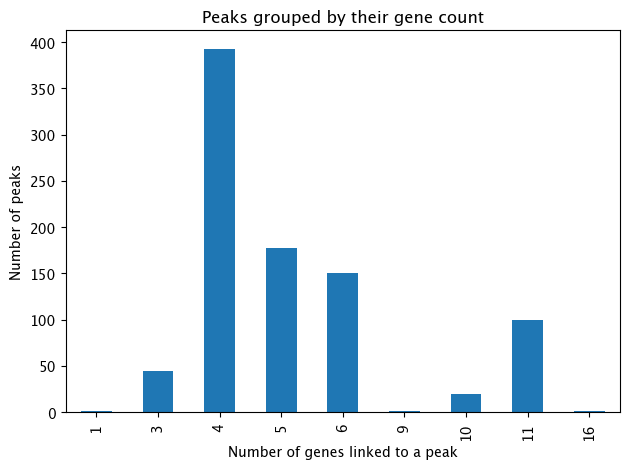

Average peak for each gene 5.425675675675675


In [11]:
plot_peaks_per_gene(CRISPRi_data_validated_E_G , peak_col='Element name', gene_col='Gene',)

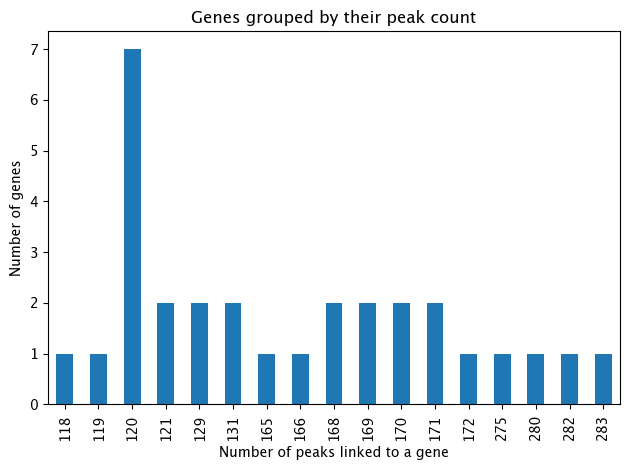

Average gene for each peak 160.6


In [12]:
plot_genes_per_peak(CRISPRi_data_validated_E_G , peak_col='Element name', gene_col='Gene',)

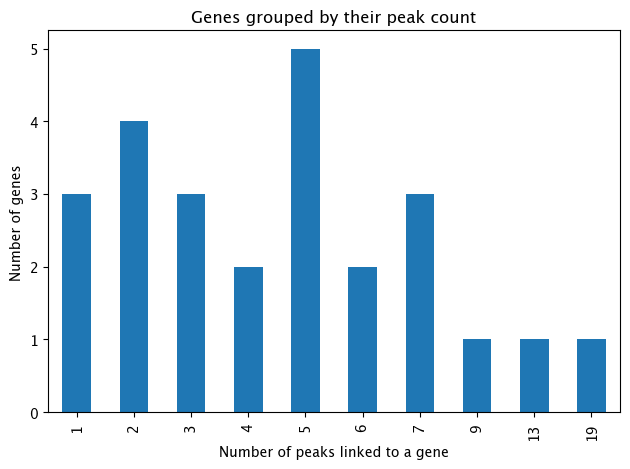

Average gene for each peak 5.08


In [13]:
plot_genes_per_peak(CRISPRi_data_validated_True , peak_col='Element name', gene_col='Gene',)

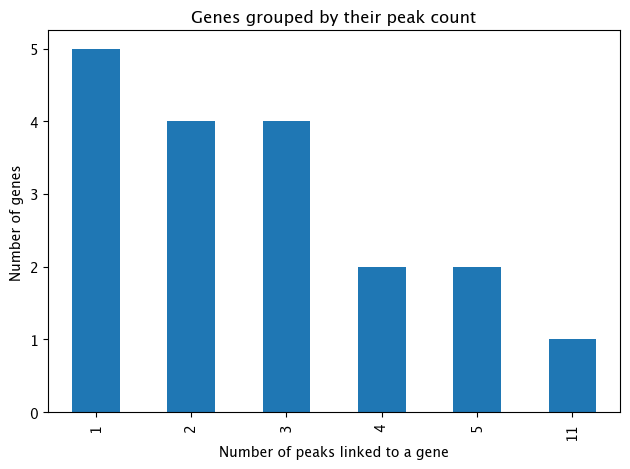

Average gene for each peak 3.0


In [14]:
plot_genes_per_peak(CRISPRi_data_validated_True_E , peak_col='Element name', gene_col='Gene',)

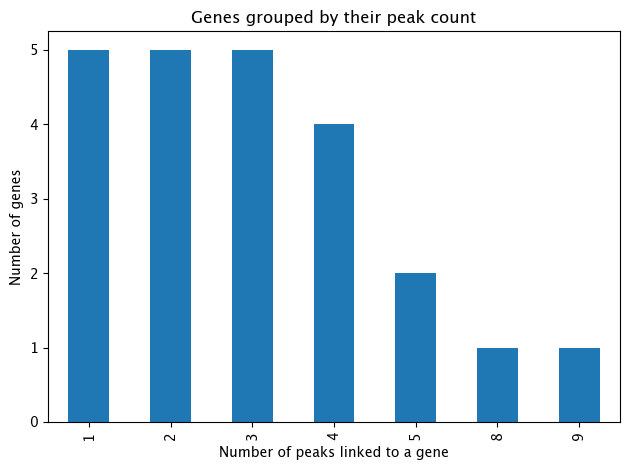

Average gene for each peak 3.1739130434782608


In [15]:
plot_genes_per_peak(CRISPRi_data_validated_True_S , peak_col='Element name', gene_col='Gene',)

In [16]:
# read bed file with gene coordinates

cols_to_use = [
    "chr",  # chromosome
    "start",  # start position
    "end",    # end position
    "name",   # gene name
    "score",  # score (optional, can be ignored)
    "strand",  # strand information (optional, can be ignored)
    "Ensembl_ID",
    "gene_type"
]

gene_coordiate = pd.read_csv(
    "/Volumes/G-DRIVE mobile USB-C/Reference/scE2G reference/ABC referece/hg38/CollapsedGeneBounds.hg38.bed",        # path to your BED
    sep="\t",                # BEDs are tab‑delimited
    header=None,              
    names= cols_to_use,       # assign column names
    comment="#",             # ignore optional header lines starting with '#'
    dtype={
       "chrom": "category",  # optional: saves memory
        "start": "uint32",
        "end":   "uint32"
    },
    engine="c",              # fast C parser; good for large files
)
gene_coordiate

,chr,start,end,name,score,strand,Ensembl_ID,gene_type
0,chr1,34610,36081,FAM138A,0,-,ENSG00000237613,lincRNA
1,chr1,34610,36081,FAM138F,0,-,ENSG00000282591,lincRNA
2,chr1,69090,70008,OR4F5,0,+,ENSG00000186092,protein_coding
3,chr1,817370,819834,FAM87B,0,+,ENSG00000177757,lincRNA
4,chr1,826205,827522,LINC00115,0,-,ENSG00000225880,lincRNA
...,...,...,...,...,...,...,...,...
20662,chrY,21382973,21386360,PRORY,0,-,ENSG00000183146,protein_coding
20663,chrY,21583599,21594666,TTTY13,0,-,ENSG00000184991,lincRNA
20664,chrY,22296797,22298876,TTTY5,0,-,ENSG00000215560,lincRNA
20665,chrY,23129354,23199092,DAZ1,0,-,ENSG00000188120,protein_coding


In [17]:
# save tss to a new column

gene_coordiate_sub = gene_coordiate[['chr', 'start', 'end', 'name', 'strand']].copy()
gene_coordiate_sub["tss"] = np.where(gene_coordiate_sub["strand"] == "+", gene_coordiate_sub["start"], gene_coordiate_sub["end"])
gene_coordiate_sub

,chr,start,end,name,strand,tss
0,chr1,34610,36081,FAM138A,-,36081
1,chr1,34610,36081,FAM138F,-,36081
2,chr1,69090,70008,OR4F5,+,69090
3,chr1,817370,819834,FAM87B,+,817370
4,chr1,826205,827522,LINC00115,-,827522
...,...,...,...,...,...,...
20662,chrY,21382973,21386360,PRORY,-,21386360
20663,chrY,21583599,21594666,TTTY13,-,21594666
20664,chrY,22296797,22298876,TTTY5,-,22298876
20665,chrY,23129354,23199092,DAZ1,-,23199092


In [18]:
# add tss to CRISPRi data
CRISPRi_data_validated_tss = (
    CRISPRi_data_validated
    .merge(gene_coordiate_sub[['name', 'tss']],        # keep only the needed columns
           left_on='Gene',             # column in df1
           right_on='name',            # column in df2
           how='left',
           validate="many_to_one")                 # keep all rows of df1
    .drop(columns='name')              # ‘name’ is now redundant
)

CRISPRi_data_validated_tss

,chr,start,end,Element name,Gene,Adjusted p-value,Significant,Fraction change in gene expr,Power to detect 25% effects,Valid E-G connection,tss
0,chr19,12996905,12998745,promoter|chr19:12996905-12998745,BAX,0.996175,False,-0.011717,0.998678,True,48954859
1,chr19,48812505,48813005,genic|chr19:48812505-48813005,BAX,0.996175,False,-0.024121,1.000000,True,48954859
2,chr19,48817545,48818085,genic|chr19:48817545-48818085,BAX,0.962221,False,-0.037555,0.999977,True,48954859
3,chr19,48824385,48824925,intergenic|chr19:48824385-48824925,BAX,0.996175,False,0.005709,1.000000,True,48954859
4,chr19,48824985,48825585,intergenic|chr19:48824985-48825585,BAX,0.996175,False,0.010611,1.000000,True,48954859
...,...,...,...,...,...,...,...,...,...,...,...
4813,chr19,13507325,13507905,genic|chr19:13507325-13507905,WDR83OS,0.916742,False,0.029914,0.998172,True,12669651
4814,chr19,13512165,13512685,genic|chr19:13512165-13512685,WDR83OS,0.811961,False,0.057268,0.996936,True,12669651
4815,chr19,13539145,13539665,genic|chr19:13539145-13539665,WDR83OS,0.811961,False,0.060105,0.973336,True,12669651
4816,chr19,13648285,13648785,intergenic|chr19:13648285-13648785,WDR83OS,0.368422,False,0.159096,0.924513,True,12669651


In [19]:
# calculate distance to TSS
CRISPRi_data_validated_tss['distance_to_tss'] = (
    ((CRISPRi_data_validated_tss['end'] + CRISPRi_data_validated_tss['start']) // 2 - CRISPRi_data_validated_tss['tss']).abs()
)
CRISPRi_data_validated_tss

,chr,start,end,Element name,Gene,Adjusted p-value,Significant,Fraction change in gene expr,Power to detect 25% effects,Valid E-G connection,tss,distance_to_tss
0,chr19,12996905,12998745,promoter|chr19:12996905-12998745,BAX,0.996175,False,-0.011717,0.998678,True,48954859,35957034
1,chr19,48812505,48813005,genic|chr19:48812505-48813005,BAX,0.996175,False,-0.024121,1.000000,True,48954859,142104
2,chr19,48817545,48818085,genic|chr19:48817545-48818085,BAX,0.962221,False,-0.037555,0.999977,True,48954859,137044
3,chr19,48824385,48824925,intergenic|chr19:48824385-48824925,BAX,0.996175,False,0.005709,1.000000,True,48954859,130204
4,chr19,48824985,48825585,intergenic|chr19:48824985-48825585,BAX,0.996175,False,0.010611,1.000000,True,48954859,129574
...,...,...,...,...,...,...,...,...,...,...,...,...
4813,chr19,13507325,13507905,genic|chr19:13507325-13507905,WDR83OS,0.916742,False,0.029914,0.998172,True,12669651,837964
4814,chr19,13512165,13512685,genic|chr19:13512165-13512685,WDR83OS,0.811961,False,0.057268,0.996936,True,12669651,842774
4815,chr19,13539145,13539665,genic|chr19:13539145-13539665,WDR83OS,0.811961,False,0.060105,0.973336,True,12669651,869754
4816,chr19,13648285,13648785,intergenic|chr19:13648285-13648785,WDR83OS,0.368422,False,0.159096,0.924513,True,12669651,978884


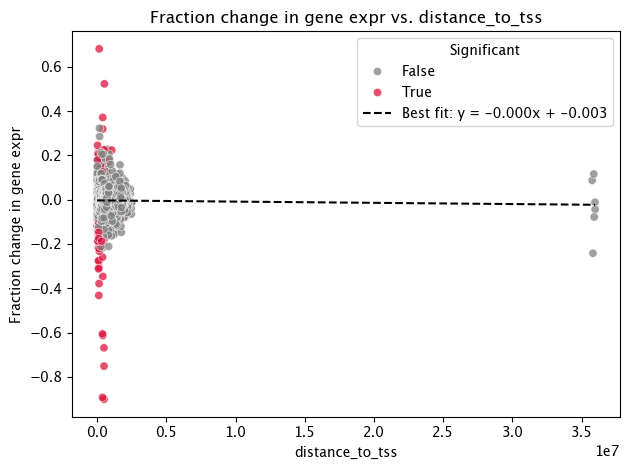

In [20]:
plot_values(CRISPRi_data_validated_tss, x_col="distance_to_tss", y_col="Fraction change in gene expr", hue_col="Significant", line_fit=True)

In [21]:
CRISPRi_data_validated_tss_sub = CRISPRi_data_validated_tss[CRISPRi_data_validated_tss["distance_to_tss"] < 10000000].copy()
CRISPRi_data_validated_tss_sub

,chr,start,end,Element name,Gene,Adjusted p-value,Significant,Fraction change in gene expr,Power to detect 25% effects,Valid E-G connection,tss,distance_to_tss
1,chr19,48812505,48813005,genic|chr19:48812505-48813005,BAX,0.996175,False,-0.024121,1.000000,True,48954859,142104
2,chr19,48817545,48818085,genic|chr19:48817545-48818085,BAX,0.962221,False,-0.037555,0.999977,True,48954859,137044
3,chr19,48824385,48824925,intergenic|chr19:48824385-48824925,BAX,0.996175,False,0.005709,1.000000,True,48954859,130204
4,chr19,48824985,48825585,intergenic|chr19:48824985-48825585,BAX,0.996175,False,0.010611,1.000000,True,48954859,129574
5,chr19,48828378,48829005,promoter|chr19:48828378-48829005,BAX,0.996175,False,0.012201,1.000000,True,48954859,126168
...,...,...,...,...,...,...,...,...,...,...,...,...
4813,chr19,13507325,13507905,genic|chr19:13507325-13507905,WDR83OS,0.916742,False,0.029914,0.998172,True,12669651,837964
4814,chr19,13512165,13512685,genic|chr19:13512165-13512685,WDR83OS,0.811961,False,0.057268,0.996936,True,12669651,842774
4815,chr19,13539145,13539665,genic|chr19:13539145-13539665,WDR83OS,0.811961,False,0.060105,0.973336,True,12669651,869754
4816,chr19,13648285,13648785,intergenic|chr19:13648285-13648785,WDR83OS,0.368422,False,0.159096,0.924513,True,12669651,978884


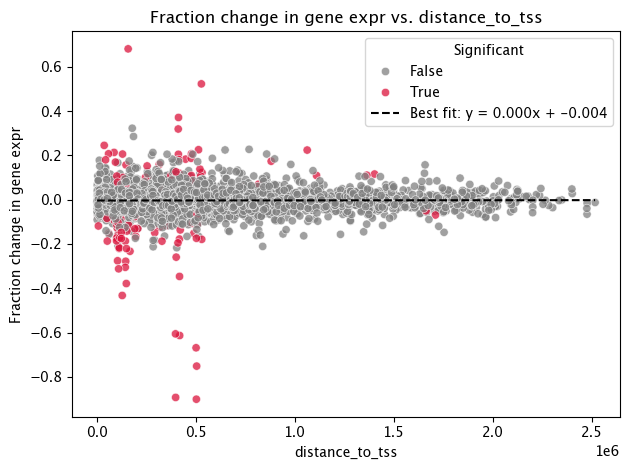

In [22]:
plot_values(CRISPRi_data_validated_tss_sub, x_col="distance_to_tss", y_col="Fraction change in gene expr", hue_col="Significant", line_fit=True)

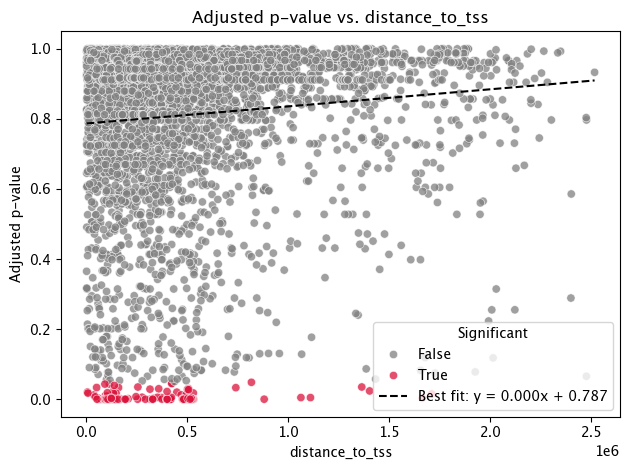

In [25]:
plot_values(CRISPRi_data_validated_tss_sub, x_col="distance_to_tss", y_col="Adjusted p-value", hue_col="Significant", line_fit=True)

In [26]:
CRISPRi_data_validated_tss_sub_sig = CRISPRi_data_validated_tss_sub[CRISPRi_data_validated_tss_sub['Significant'] == True ].copy()

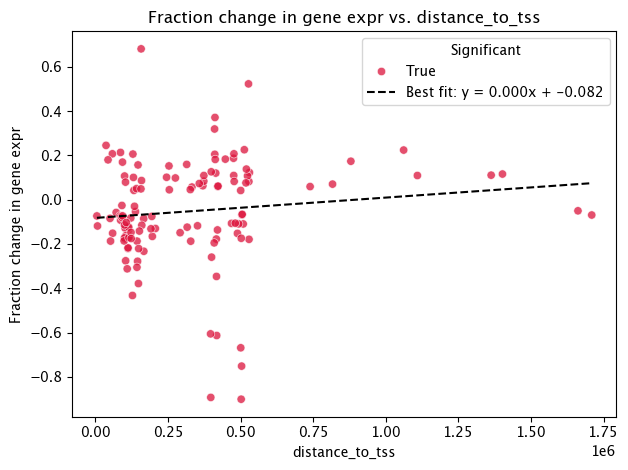

In [27]:
plot_values(CRISPRi_data_validated_tss_sub_sig, x_col="distance_to_tss", y_col="Fraction change in gene expr", hue_col="Significant", line_fit=True)

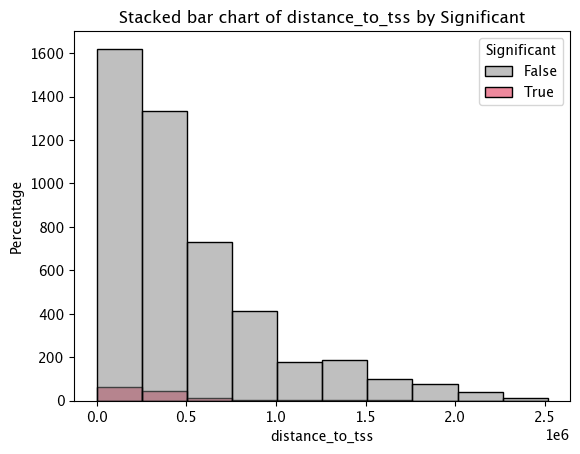

In [29]:
plot_stack_bar(CRISPRi_data_validated_tss_sub, bin = 10, value_col = "distance_to_tss", hue_col = "Significant")